# MINI PROJETO - AD e RF - TITANIC SURVIVAL PREDICTION

### Projeto da cadeira de Sistemas Inteligentes (2023.2 - IF684EC - CIn - UFPE) que consiste em utilizar uma Árvore de Decisão (AD) e uma Floresta Aleatória (RF) para prever se uma pessoa sobreviveria ou não ao desastre do Titanic.

### Desenvolvido por:


> Rafael do Nascimento Moura - rnm4@cin.ufpe.br

> Rodrigo Rocha Moura - rrm2@cin.ufpe.br

## Instalando dependências



In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

## Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd # utilizada para analisar a base de dados
import matplotlib.pyplot as plt # utilizada para plotar gráficos
import seaborn as sns # utilizada para visualização de dados
from sklearn import tree # para printar a árvore de decisão
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Floresta Aleatória
from sklearn.model_selection import GridSearchCV # cross validation

## Analisando a base de dados

In [ ]:
titanic_data = pd.read_csv('data/train.csv') # titanic_data contém o conteúdo de treinamento

In [ ]:
titanic_data # uma breve visualização do conteúdo de treinamento

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### É importante entender cada variável para construir relações que ajudarão a resolver o problema. Desse modo, aqui está a descrição das colunas do dataframe:

> PassengerId: ID do passageiro.

> Survived: 0 - passageiro não sobreviveu ao desastre; 1 - passageiro sobreviveu ao desastre.

> Pclass: A classe do ticket do passageiro, que pode ser primeira classe (1), segunda classe (2) e terceira classe (3).

> Name: Nome do passageiro.

> Sex: male (masculino) ou female (feminino).

> Age: Idade do passageiro. ***É fracionária se menor que 1. Se a idade for uma estimativa, então é da forma xx.5.***

> SibSp: Quantidade de passageiros que são das categorias irmão, irmã, meio-irmão, meio-irmã, marido, esposa.

> Parch: Quantidades de passageiros que são das categorias pai, mãe, filha, filho, enteada, enteado.

> Ticket: O código do ticket do passageiro.

> Fare: O preço da passagem do passageiro.

> Cabin: O número da cabine do passageiro.

> Embarked: O porto pelo qual o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Analisando a coluna de sexo:**

In [ ]:
print(titanic_data['Sex'].value_counts(dropna = False)) # quantidade de homens e mulheres à bordo
titanic_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por sexo

male      577
female    314
Name: Sex, dtype: int64


Sex  Survived
0  female  0.742038
1    male  0.188908

Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Sexo')

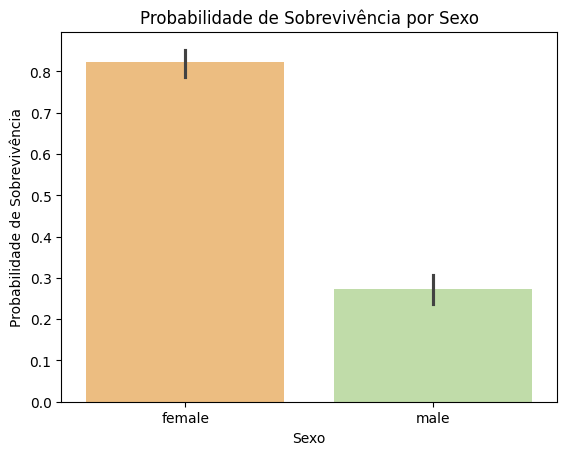

In [ ]:
sns.barplot(x = 'Sex', y ='Survived', data = titanic_data, palette = "Spectral", legend=False, hue = 'Sex') # visualização da probabilidade acima
plt.xlabel('Sexo')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Sexo')

**Analisando a coluna da classe do passageiro:**

In [ ]:
print(titanic_data['Pclass'].value_counts(dropna = False)) # quantidade de passageiros por classe
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por classe

3    491
1    216
2    184
Name: Pclass, dtype: int64


Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

<ipython-input-120-e9c0df52c3c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data, palette = "cubehelix") # visualização da probabilidade acima


Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Classe de Passageiro')

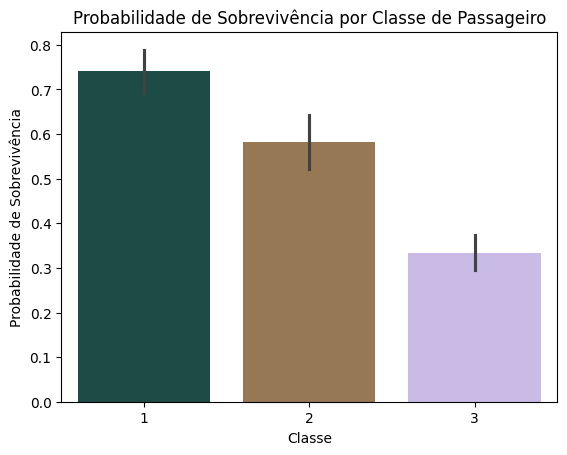

In [ ]:
sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data, palette = "cubehelix") # visualização da probabilidade acima
plt.xlabel('Classe')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Classe de Passageiro')

Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Sexo e por Classe de Passageiro')

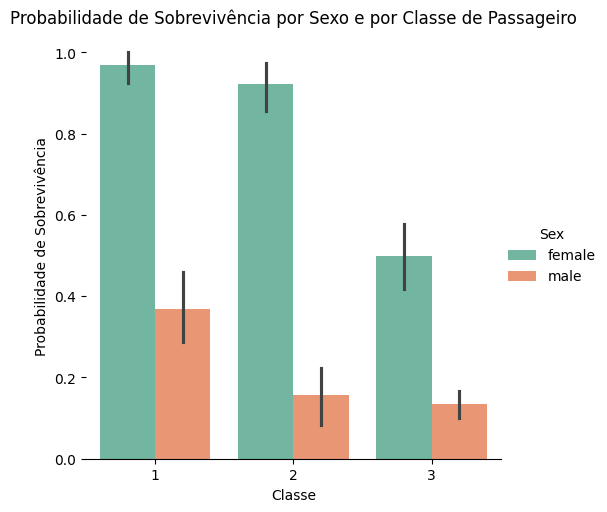

In [ ]:
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_data, kind = 'bar', palette = "Set2")
g.despine(left = True)
plt.xlabel('Classe')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Sexo e por Classe de Passageiro')

**Analisando a coluna do porto de embarque do passageiro:**

In [ ]:
print(titanic_data['Embarked'].value_counts(dropna = False)) # quantidade de embarques por portos
titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por porto de embarque

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

<ipython-input-12-5bf658b81302>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima
<ipython-input-12-5bf658b81302>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima


Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Porto de Embarque')

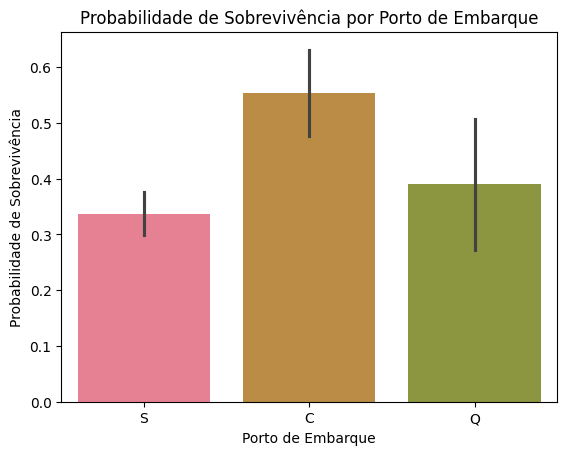

In [ ]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima
plt.xlabel('Porto de Embarque')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Porto de Embarque')

A partir da distribuição acima, observa-se que há maior chance de sobrevivência caso o embarque seja no porto de Cherbourg e menor caso seja em Southampton.

In [ ]:
g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque

titulos = ['Southampton', 'Cherbourg', 'Queenstown']
for ax, titulo in zip(g.axes.flat, titulos):
    ax.set_title(titulo)
    ax.set_xlabel('Classe')
    ax.set_ylabel('Quantidade')

plt.show()

<ipython-input-13-9439c4920a5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque
<ipython-input-13-9439c4920a5c>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque


Foi apresentado anteriormente que a terceira classe é a que possui a menor chance de sobrevivência.

A discrepância apresentada no caso dos portos de embarque pode ser explicada pela distribuição acima, pois a maior parte dos passageiros da terceira classe embarcaram no porto de Southampton.

**Analisando a coluna de idade:**

Text(0.5, 1.0, 'Distribuição de Idade dos Passageiros')

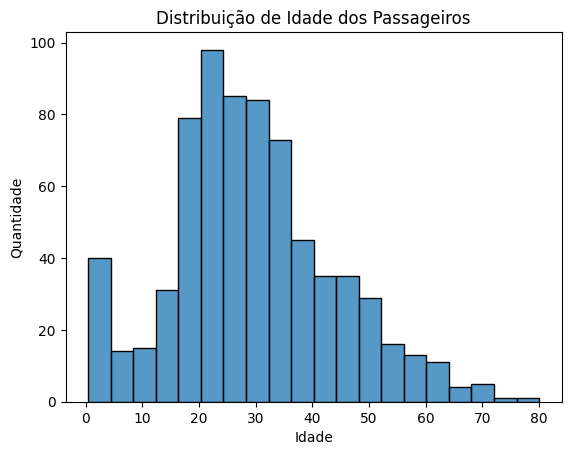

In [ ]:
sns.histplot(titanic_data['Age']) # histograma
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade dos Passageiros')

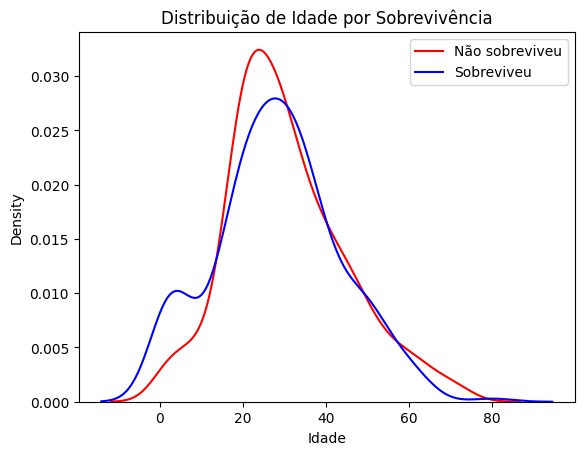

In [ ]:
sns.kdeplot(titanic_data['Age'][titanic_data['Survived'] == 0], label = 'Não sobreviveu', color='red') # distribuição de idade por sobrevivência
sns.kdeplot(titanic_data['Age'][titanic_data['Survived'] == 1], label = 'Sobreviveu', color='blue')
plt.xlabel('Idade')
plt.title('Distribuição de Idade por Sobrevivência')
plt.legend()

**Explorando as correlações entre as variáveis numéricas e a sobrevivência do passageiro:**

<Axes: >

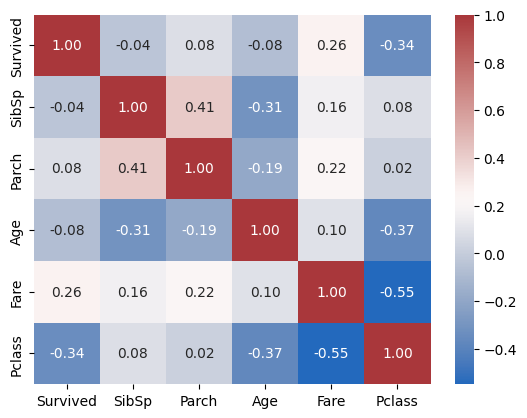

In [ ]:
sns.heatmap(titanic_data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare', 'Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'vlag')

Ao observar o heatmap acima, vemos que *Pclass* (classe social) e *Fare* (preço da passagem) são as que possuem maior correlação com a sobrevivência e inclusive entre si. O que nos diz que uma pessoa pertencente a uma classe social mais alta (menor número) pagou mais pela passagem e teve mais chance de sobrevivência.


## Dividindo o dataset de treinamento e tratando os dados

Primeiramente, devemos conferir a distribuição dos sobreviventes e não sobreviventes:

In [ ]:
# Conta a quantidade de 0's e 1's na coluna "Survived"
survived_counts = titanic_data['Survived'].value_counts()

# Imprime os resultados
print(f"Quantidade de 0's (não sobreviventes): {survived_counts[0]}")
print(f"Quantidade de 1's (sobreviventes): {survived_counts[1]}")

Quantidade de 0's (não sobreviventes): 549
Quantidade de 1's (sobreviventes): 342


Como está desigual, devemos igualar a quantidade de 0's e 1's.

In [ ]:
# Primeiro, selecione aleatoriamente 207 linhas dos sobreviventes
sobreviventes_aleatorios = titanic_data[titanic_data['Survived'] == 1].sample(n=207, random_state=42)

# Adicione essas linhas ao DataFrame original
titanic_data = pd.concat([titanic_data, sobreviventes_aleatorios])

# Embaralhe o DataFrame
titanic_data = titanic_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
survived_counts = titanic_data['Survived'].value_counts()

# Imprime os resultados
print(f"Quantidade de 0's (não sobreviventes): {survived_counts[0]}")
print(f"Quantidade de 1's (sobreviventes): {survived_counts[1]}")

Quantidade de 0's (não sobreviventes): 549
Quantidade de 1's (sobreviventes): 549


Agora podemos dividir o dataset de treino e de teste utilizando o arquivo train.csv.

A divisão é 80/20 mas não é aleatória.

Aqui divide-se de forma equivalente entre TRAIN e TEST as variáveis descritas, isto é, as variáveis que consideramos mais importantes para a resolução do problema.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

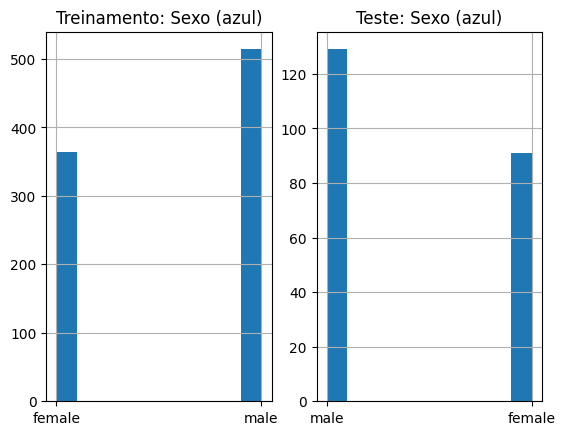

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Sex'].hist()
plt.title('Treinamento: Sexo (azul)')

plt.subplot(1,2,2)
strat_test_set['Sex'].hist()
plt.title('Teste: Sexo (azul)')

plt.show()

<ipython-input-22-6ab62c2e2b01>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-22-6ab62c2e2b01>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


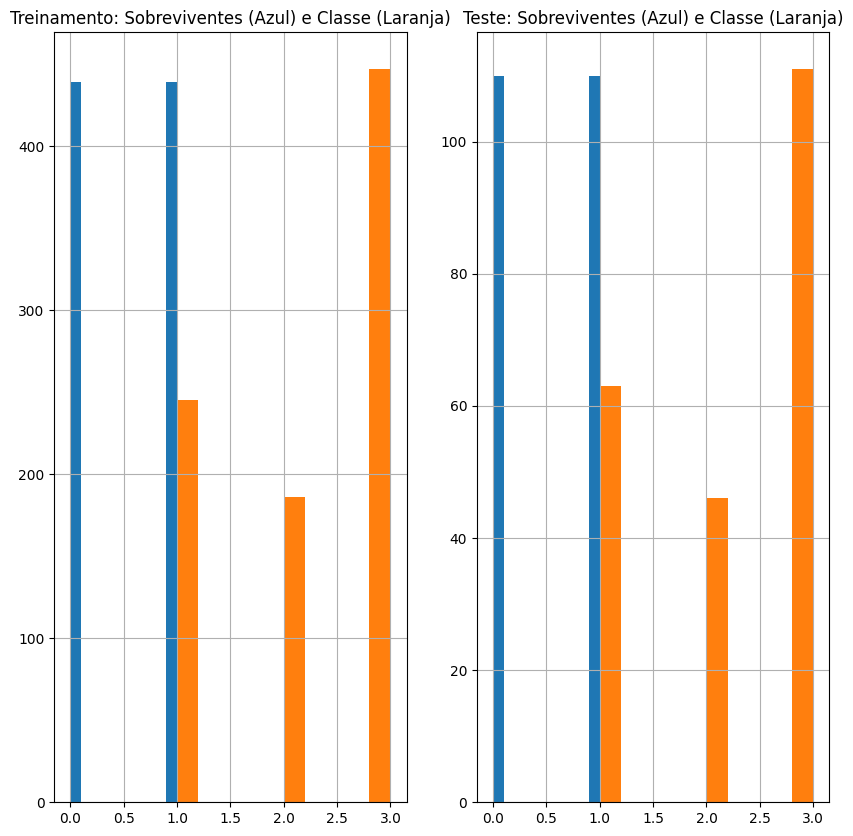

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

# Adicione títulos e rótulos
plt.subplot(1, 2, 1)
plt.title('Treinamento: Sobreviventes (Azul) e Classe (Laranja)')

plt.subplot(1, 2, 2)
plt.title('Teste: Sobreviventes (Azul) e Classe (Laranja)')

plt.show()

Temos valores faltando?

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 1074 to 686
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  878 non-null    int64  
 1   Survived     878 non-null    int64  
 2   Pclass       878 non-null    int64  
 3   Name         878 non-null    object 
 4   Sex          878 non-null    object 
 5   Age          713 non-null    float64
 6   SibSp        878 non-null    int64  
 7   Parch        878 non-null    int64  
 8   Ticket       878 non-null    object 
 9   Fare         878 non-null    float64
 10  Cabin        235 non-null    object 
 11  Embarked     875 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.2+ KB


Temos valores faltando na coluna de Idade.

Assim, vamos preencher as células vazias com a média da Idade da respectiva classe (sobreviveu ou não sobreviveu).

Preenche-se com a média da coluna Idade caso não há a coluna "Survived", isto é, quando o dataset é o test.csv.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin # mixa automaticamente as funções fit e transform sem ter que definir explicitamente
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if 'Survived' in X.columns:
            # Calcula a média da idade para cada valor de Survived (0 ou 1)
            mean_age_by_survived = X.groupby('Survived')['Age'].mean()

            # Preenche as idades faltantes com a média correspondente ao valor de Survived
            X['Age'] = X.apply(lambda row: mean_age_by_survived[row['Survived']] if pd.isnull(row['Age']) else row['Age'], axis=1)
        else:
            # Preenche as idades faltantes com a média da coluna de idade
            imputer = SimpleImputer(strategy="mean")
            X['Age'] = imputer.fit_transform(X[['Age']])

        return X


Visando facilitar a análise do dataset pelo modelo, vamos transformar as variáveis de categorias em variáveis numéricas da seguinte maneira:

> Substitui-se uma coluna de categoria por novas colunas que são seus possíveis valores, os quais só valem ou 0 ou 1.

O processo acima é aplicado nas colunas de sexo, porto de embarque e classe.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ["C", "S", "Q", "N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Pclass']]).toarray()

    column_names = ["Pclass1", "Pclass2", "Pclass3"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X


Também removemos as colunas que não afetam na resolução do problema: nome, código do ticket, cabine e id do passageiro.

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin):

   def fit(self, X, y=None):
    return self

   def transform(self, X):
    return X.drop(["Embarked","Name", "Ticket", "Cabin", "Sex", "N", "Pclass", "PassengerId"], axis = 1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("featuredropper", FeatureDropper())])

In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

Survived        Age  SibSp  Parch     Fare    C    S    Q  Female  Male  \
1074         1   1.000000      0      2  15.7417  1.0  0.0  0.0     1.0   0.0   
743          0  19.000000      0      0  13.0000  0.0  0.0  1.0     0.0   1.0   
579          1  18.000000      0      2  13.0000  0.0  0.0  1.0     1.0   0.0   
659          0  24.000000      2      0  73.5000  0.0  0.0  1.0     0.0   1.0   
457          1  29.000000      1      0  26.0000  0.0  0.0  1.0     1.0   0.0   
...        ...        ...    ...    ...      ...  ...  ...  ...     ...   ...   
272          0  35.000000      0      0  10.5000  0.0  0.0  1.0     0.0   1.0   
1013         0  31.088855      0      0   0.0000  0.0  0.0  1.0     0.0   1.0   
112          0  34.000000      0      0  13.0000  0.0  0.0  1.0     0.0   1.0   
23           0  31.088855      0      0   8.0500  0.0  0.0  1.0     0.0   1.0   
686          1  28.562126      0      0   7.8292  0.0  1.0  0.0     1.0   0.0   

      Pclass1  Pclass2  Pclass3  
1074      0.0      0.0      1.0  
743       0.0      1.0      0.0  
579       0.0      1.0      0.0  
659       0.0      1.0      0.0  
457       0.0      1.0      0.0  
...       ...      ...      ...  
272       0.0      1.0      0.0  
1013      0.0      1.0      0.0  
112       0.0      1.0      0.0  
23        0.0      0.0      1.0  
686       0.0      0.0      1.0  

[878 rows x 13 columns]

In [ ]:
strat_train_set.info() # agora não há mais células vazias

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 1074 to 686
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  878 non-null    int64  
 1   Age       878 non-null    float64
 2   SibSp     878 non-null    int64  
 3   Parch     878 non-null    int64  
 4   Fare      878 non-null    float64
 5   C         878 non-null    float64
 6   S         878 non-null    float64
 7   Q         878 non-null    float64
 8   Female    878 non-null    float64
 9   Male      878 non-null    float64
 10  Pclass1   878 non-null    float64
 11  Pclass2   878 non-null    float64
 12  Pclass3   878 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 96.0 KB


## Experimentos:

Como estamos utilizando uma Árvore de Decisão e uma Floresta Aleatória, faz-se necessário destacar que, diferentemente do MLP, não há a necessidade de normalizarmos os dados.

Aplicando o tratamento de dados ao dataset de treino (80% de train.csv).

In [ ]:
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

X_data = X
y_data = y.to_numpy()

Aplicando o tratamento de dados ao dataset de teste (20% de train.csv).

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

X_data_test = X_test
y_data_test = y_test.to_numpy()

Aplicando o tratamento de dados ao dataset de treino completo (train.csv).

In [ ]:
final_data = pipeline.fit_transform(titanic_data)
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

X_data_final = X_final
y_data_final = y_final.to_numpy()

Descrição dos parâmetros da DecisionTreeClassifier:

- criterion: Função que mede a qualidade de uma divisão.

- splitter: Estratégia utilizada para realizar a divisão em cada nó.

- max_depth: Profundidade máxima da árvore.

- min_samples_split: Número mínimo de exemplos para realizar uma divisão num nó.

- min_samples_leaf: Número mínimo de exemplos para um nó ser uma folha.

- max_features: Número de variáveis que devem ser consideradas para escolher a melhor divisão.

- ccp_alpha: Parâmetro de complexidade utilizado no algoritmo de poda Minimal Cost-Complexity Pruning.

**Experimento 1 usando Árvore de Decisão:**

In [ ]:
clf_1 = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=4, min_samples_split=2,
                               min_samples_leaf=2, max_features=4)

clf_1.fit(X_data, y_data) # treinando o modelo

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=2)

Acurácia do modelo escolhido:

In [ ]:
clf_1.score(X_data_test, y_data_test)

0.7863636363636364

Assim, com os parâmetros,

```javascript
{
  ccp_alpha=0.0
  criterion='gini',
  splitter='best',
  max_depth=4,
  min_samples_split=2,
  min_samples_leaf=2,
  max_features=4
}
```
temos uma acurácia de 78,63%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_1.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Male     0.370847
Pclass3  0.246820
Female   0.158251
Fare     0.101837
Age      0.093531
C        0.015365
SibSp    0.013011
Q        0.000338
Parch    0.000000
S        0.000000
Pclass1  0.000000
Pclass2  0.000000

In [ ]:
feature_importance.head(10).plot(kind='bar')

<Axes: >

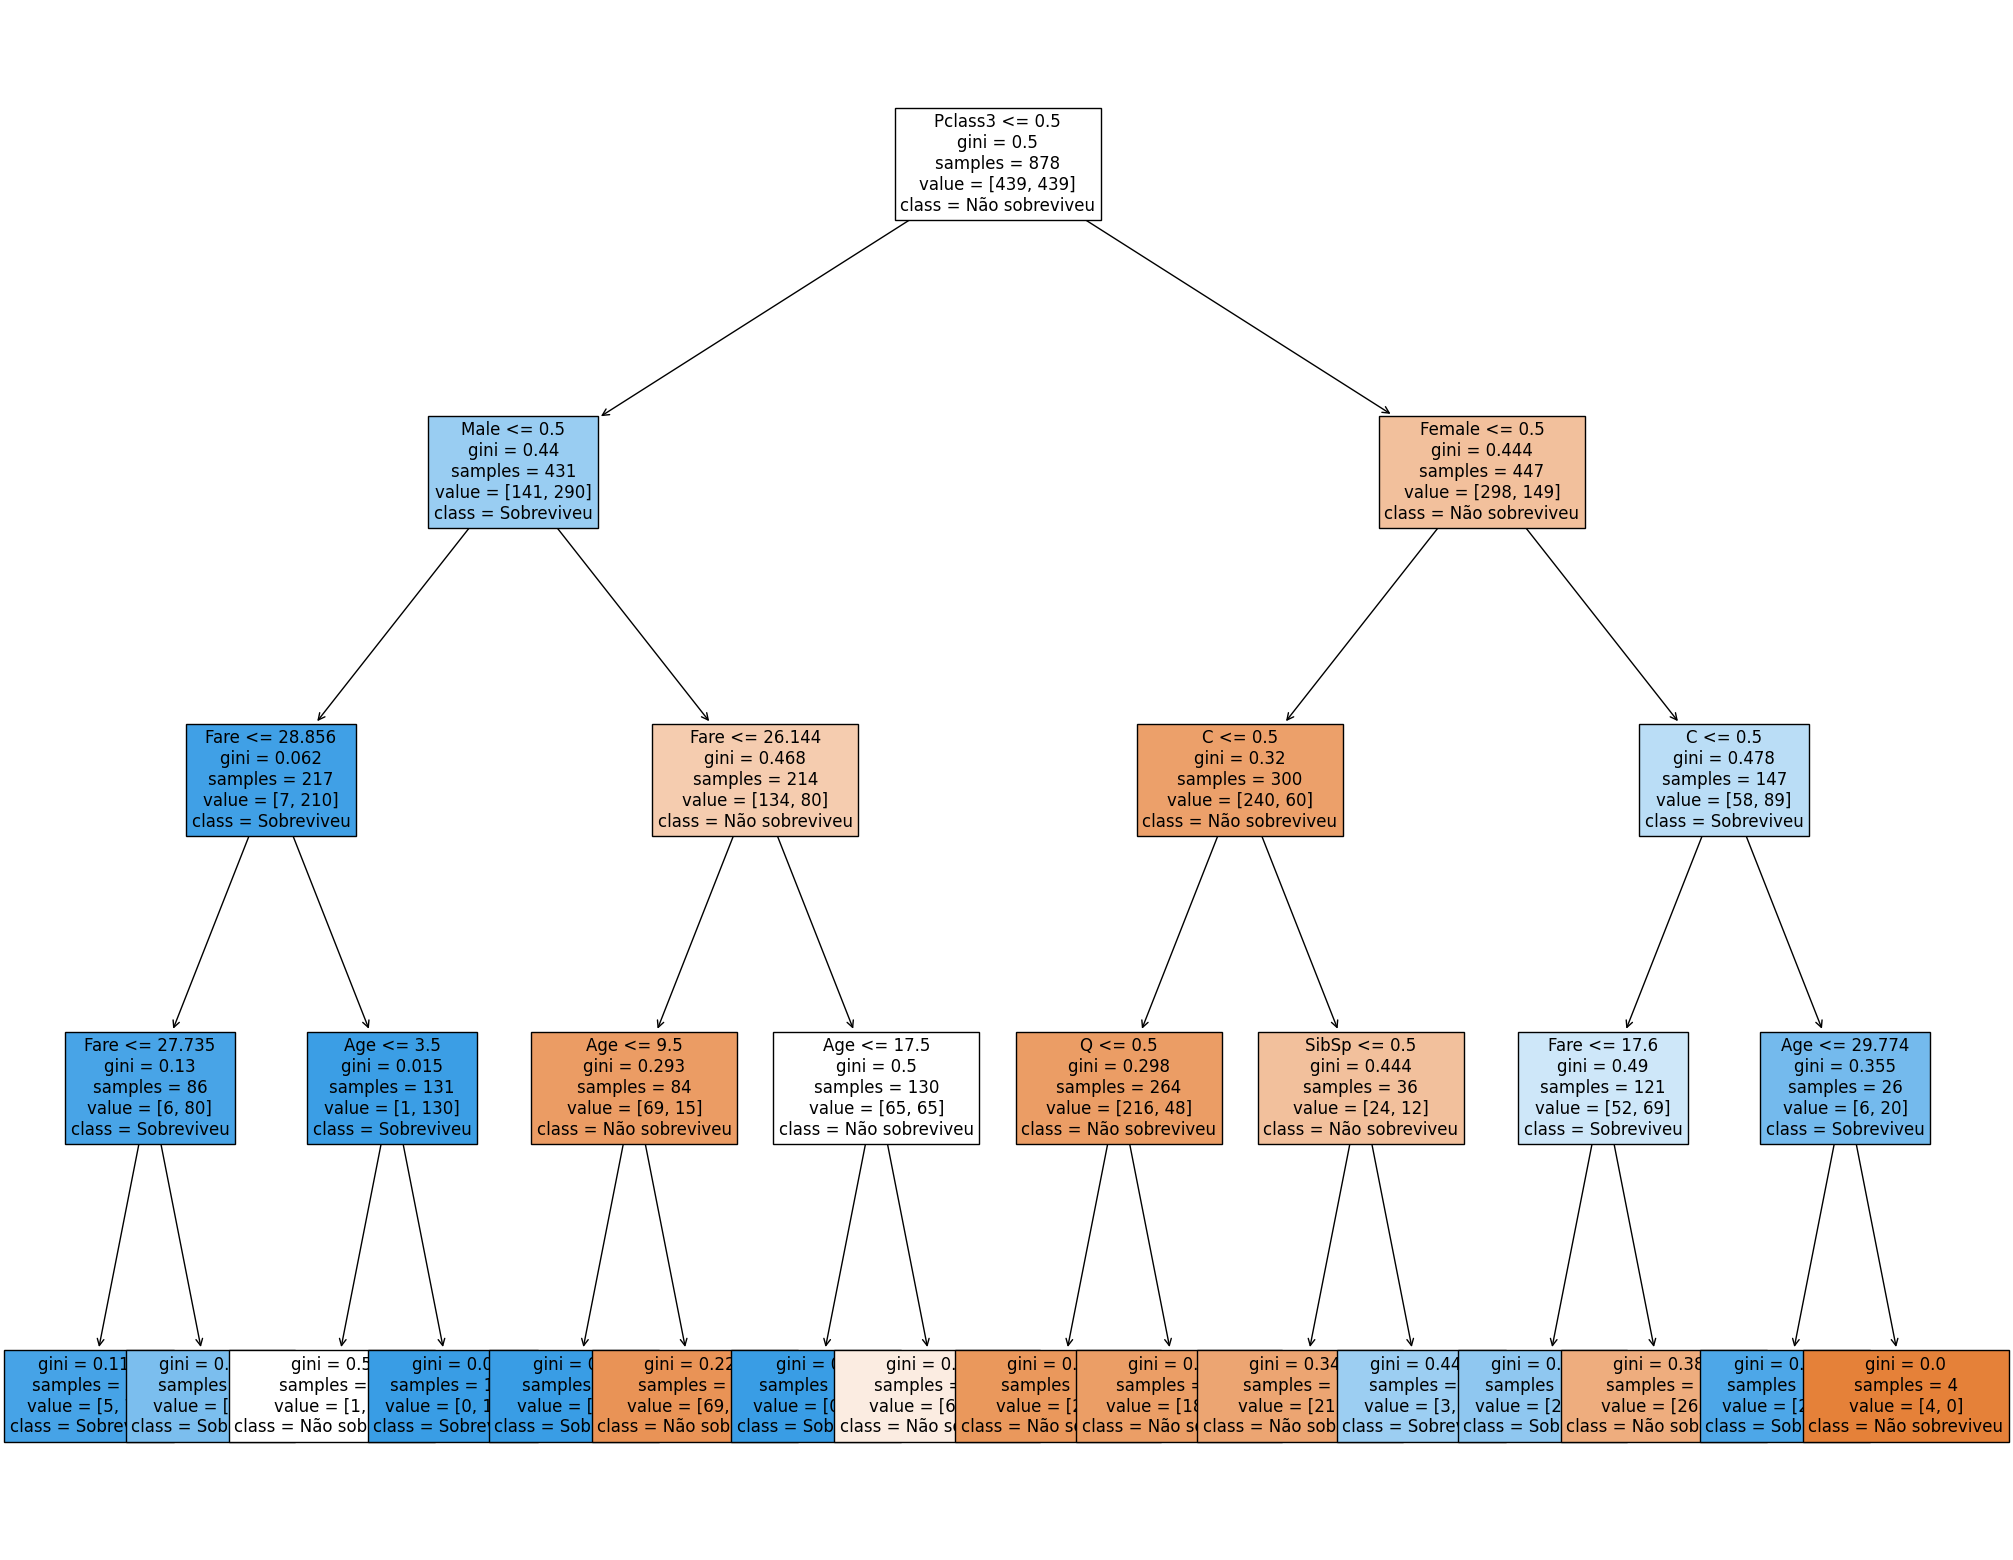

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_1,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

**Experimento 2 usando Árvore de Decisão:**

In [ ]:
clf_2 = DecisionTreeClassifier(criterion='entropy', splitter='random',
                               max_depth=12, min_samples_split=3,
                               min_samples_leaf=1)

clf_2.fit(X_data, y_data) # treinando o modelo

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3,
                       splitter='random')

Acurácia do modelo escolhido:

In [ ]:
clf_2.score(X_data_test, y_data_test)

0.8409090909090909

Assim, com os parâmetros,

```javascript
{
  ccp_alpha=0.0
  criterion='entropy',
  splitter='random',
  max_depth=12,
  min_samples_split=3,
  min_samples_leaf=1
  max_features=None
}
```
temos uma acurácia de 84,09%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_2.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Male     0.305098
Age      0.228048
Fare     0.198400
Pclass3  0.095075
SibSp    0.045387
Pclass1  0.041378
Parch    0.030628
Q        0.027096
C        0.017796
Pclass2  0.006649
S        0.004446
Female   0.000000

In [ ]:
feature_importance.head(10).plot(kind='bar')

<Axes: >

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_2,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

**Experimento 3 usando Árvore de Decisão:**

In [ ]:
clf_3 = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=8, min_samples_split=3,
                               min_samples_leaf=2, ccp_alpha=0.001)

clf_3.fit(X_data, y_data) # treinando o modelo

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, min_samples_leaf=2,
                       min_samples_split=3)

Acurácia do modelo escolhido:

In [ ]:
clf_3.score(X_data_test, y_data_test)

0.7363636363636363

Assim, com os parâmetros,

```javascript
{
  criterion='gini',
  splitter='best',
  max_depth=8,
  min_samples_split=3,
  min_samples_leaf=2,
  ccp_alpha=0.001
  max_features=None
}
```
temos uma acurácia de 73,63%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_3.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Male     0.388898
Age      0.318703
Fare     0.075927
Pclass3  0.074101
SibSp    0.051921
Pclass1  0.047854
Q        0.023480
C        0.016087
Parch    0.003027
S        0.000000
Female   0.000000
Pclass2  0.000000

In [ ]:
feature_importance.head(10).plot(kind='bar')

<Axes: >

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_3,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

**Experimento 4 usando Árvore de Decisão:**

In [ ]:
clf_4 = DecisionTreeClassifier(criterion='entropy', splitter='best',
                               max_depth=9, min_samples_split=2,
                               min_samples_leaf=1, max_features=2)

clf_4.fit(X_data, y_data) # treinando o modelo

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=2)

Acurácia do modelo escolhido:

In [ ]:
clf_4.score(X_data_test, y_data_test)

0.8272727272727273

Assim, com os parâmetros,

```javascript
{
  ccp_alpha=0.0
  criterion='entropy',
  splitter='best',
  max_depth=9,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=2
}
```
temos uma acurácia de 82,72%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_4.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Male     0.374882
Age      0.174009
Fare     0.157865
Pclass1  0.121017
Pclass2  0.056359
Parch    0.042811
SibSp    0.041685
Q        0.016231
C        0.012232
S        0.002908
Female   0.000000
Pclass3  0.000000

<Axes: >

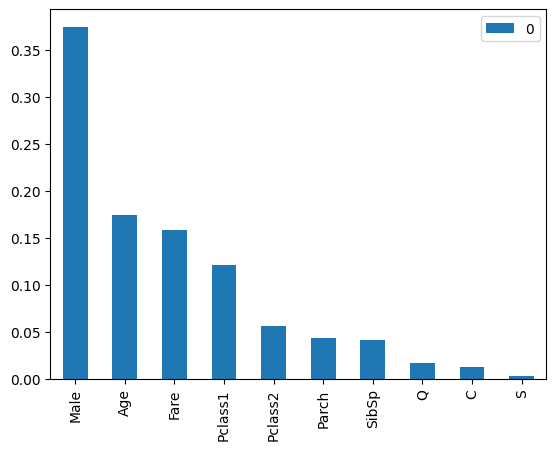

In [ ]:
feature_importance.head(10).plot(kind='bar')

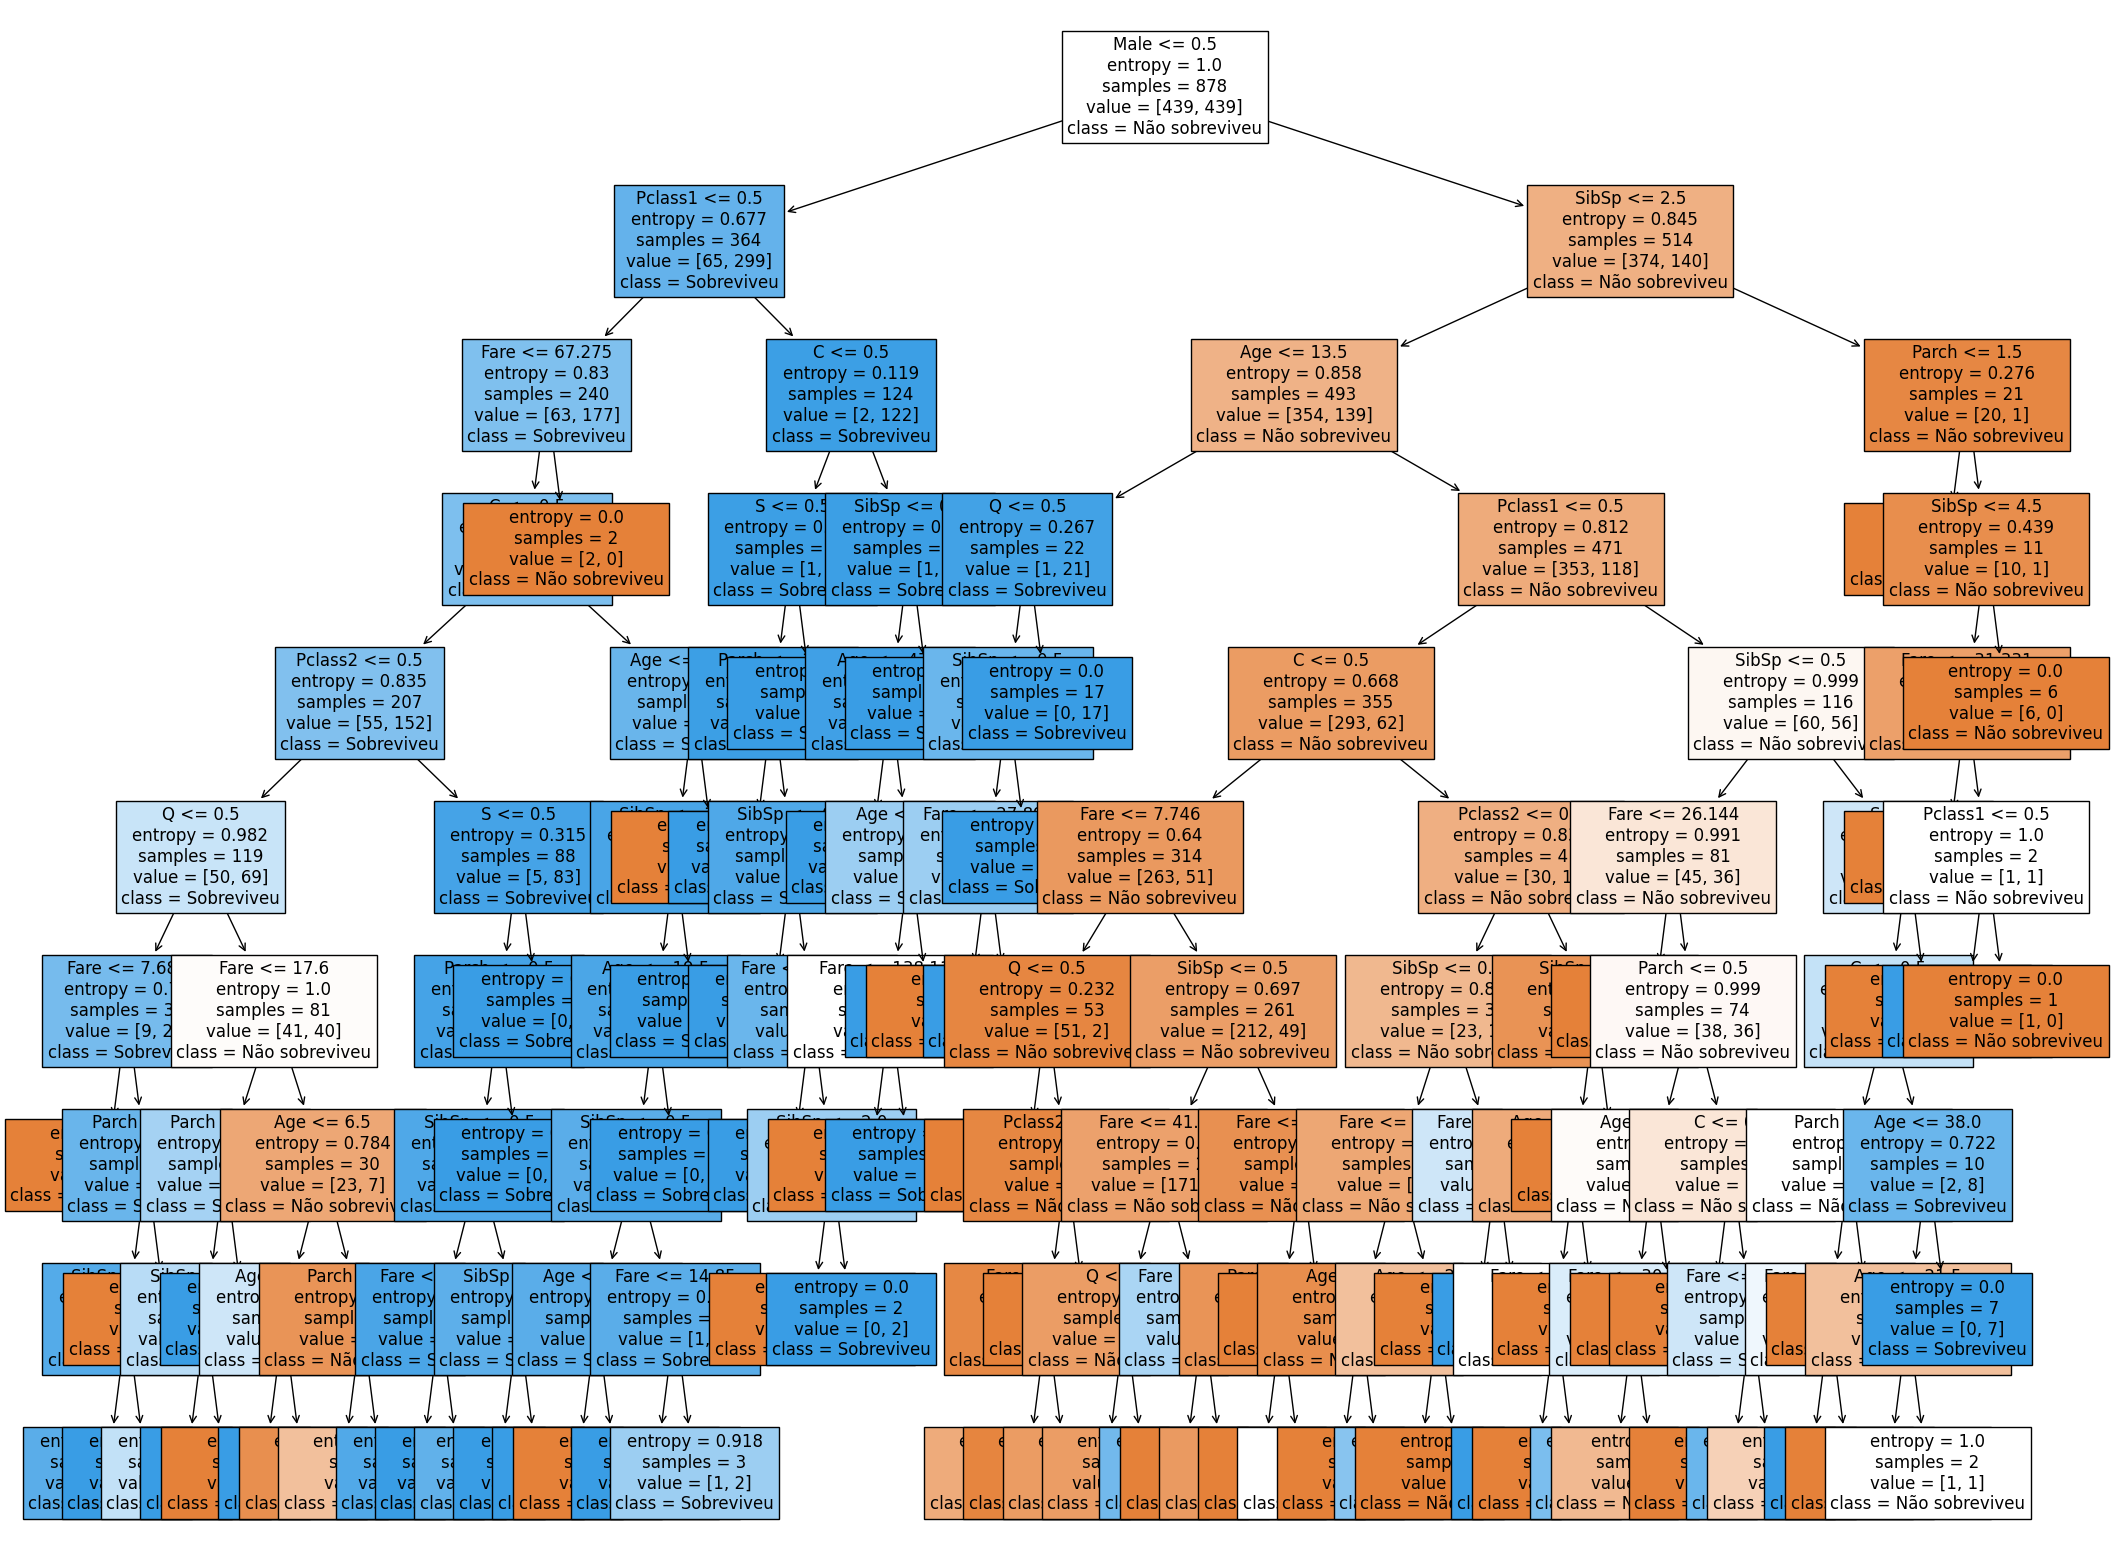

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_4,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

**Experimento 5 usando Árvore de Decisão:**

Como é possível ver na célula abaixo, estamos utilizando o GridSearchCV() (3-fold) para otimizar o parâmetros.

In [ ]:
clf_5 = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

grid_search = GridSearchCV(clf_5, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [ ]:
clf_5 = grid_search.best_estimator_ # utilizando o modelo encontrado pelo GridSearchCV

In [ ]:
clf_5.get_params() # parâmetros escolhidos pelo GridSearchCV

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Acurácia do modelo escolhido pelo GridSearchCV:

In [ ]:
clf_5.score(X_data_test, y_data_test)

0.8272727272727273

Assim, com os parâmetros,

```javascript
{
  'ccp_alpha': 0.0,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'
}
```
temos uma acurácia de 82,72%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_5.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Age      0.361179
Fare     0.238696
Female   0.231487
Pclass3  0.071580
Q        0.034211
SibSp    0.032997
Pclass2  0.012847
C        0.007793
Parch    0.006863
S        0.002346
Male     0.000000
Pclass1  0.000000

<Axes: >

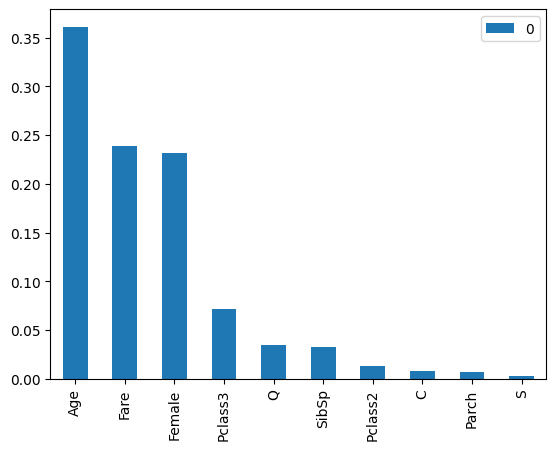

In [ ]:
feature_importance.head(10).plot(kind='bar')

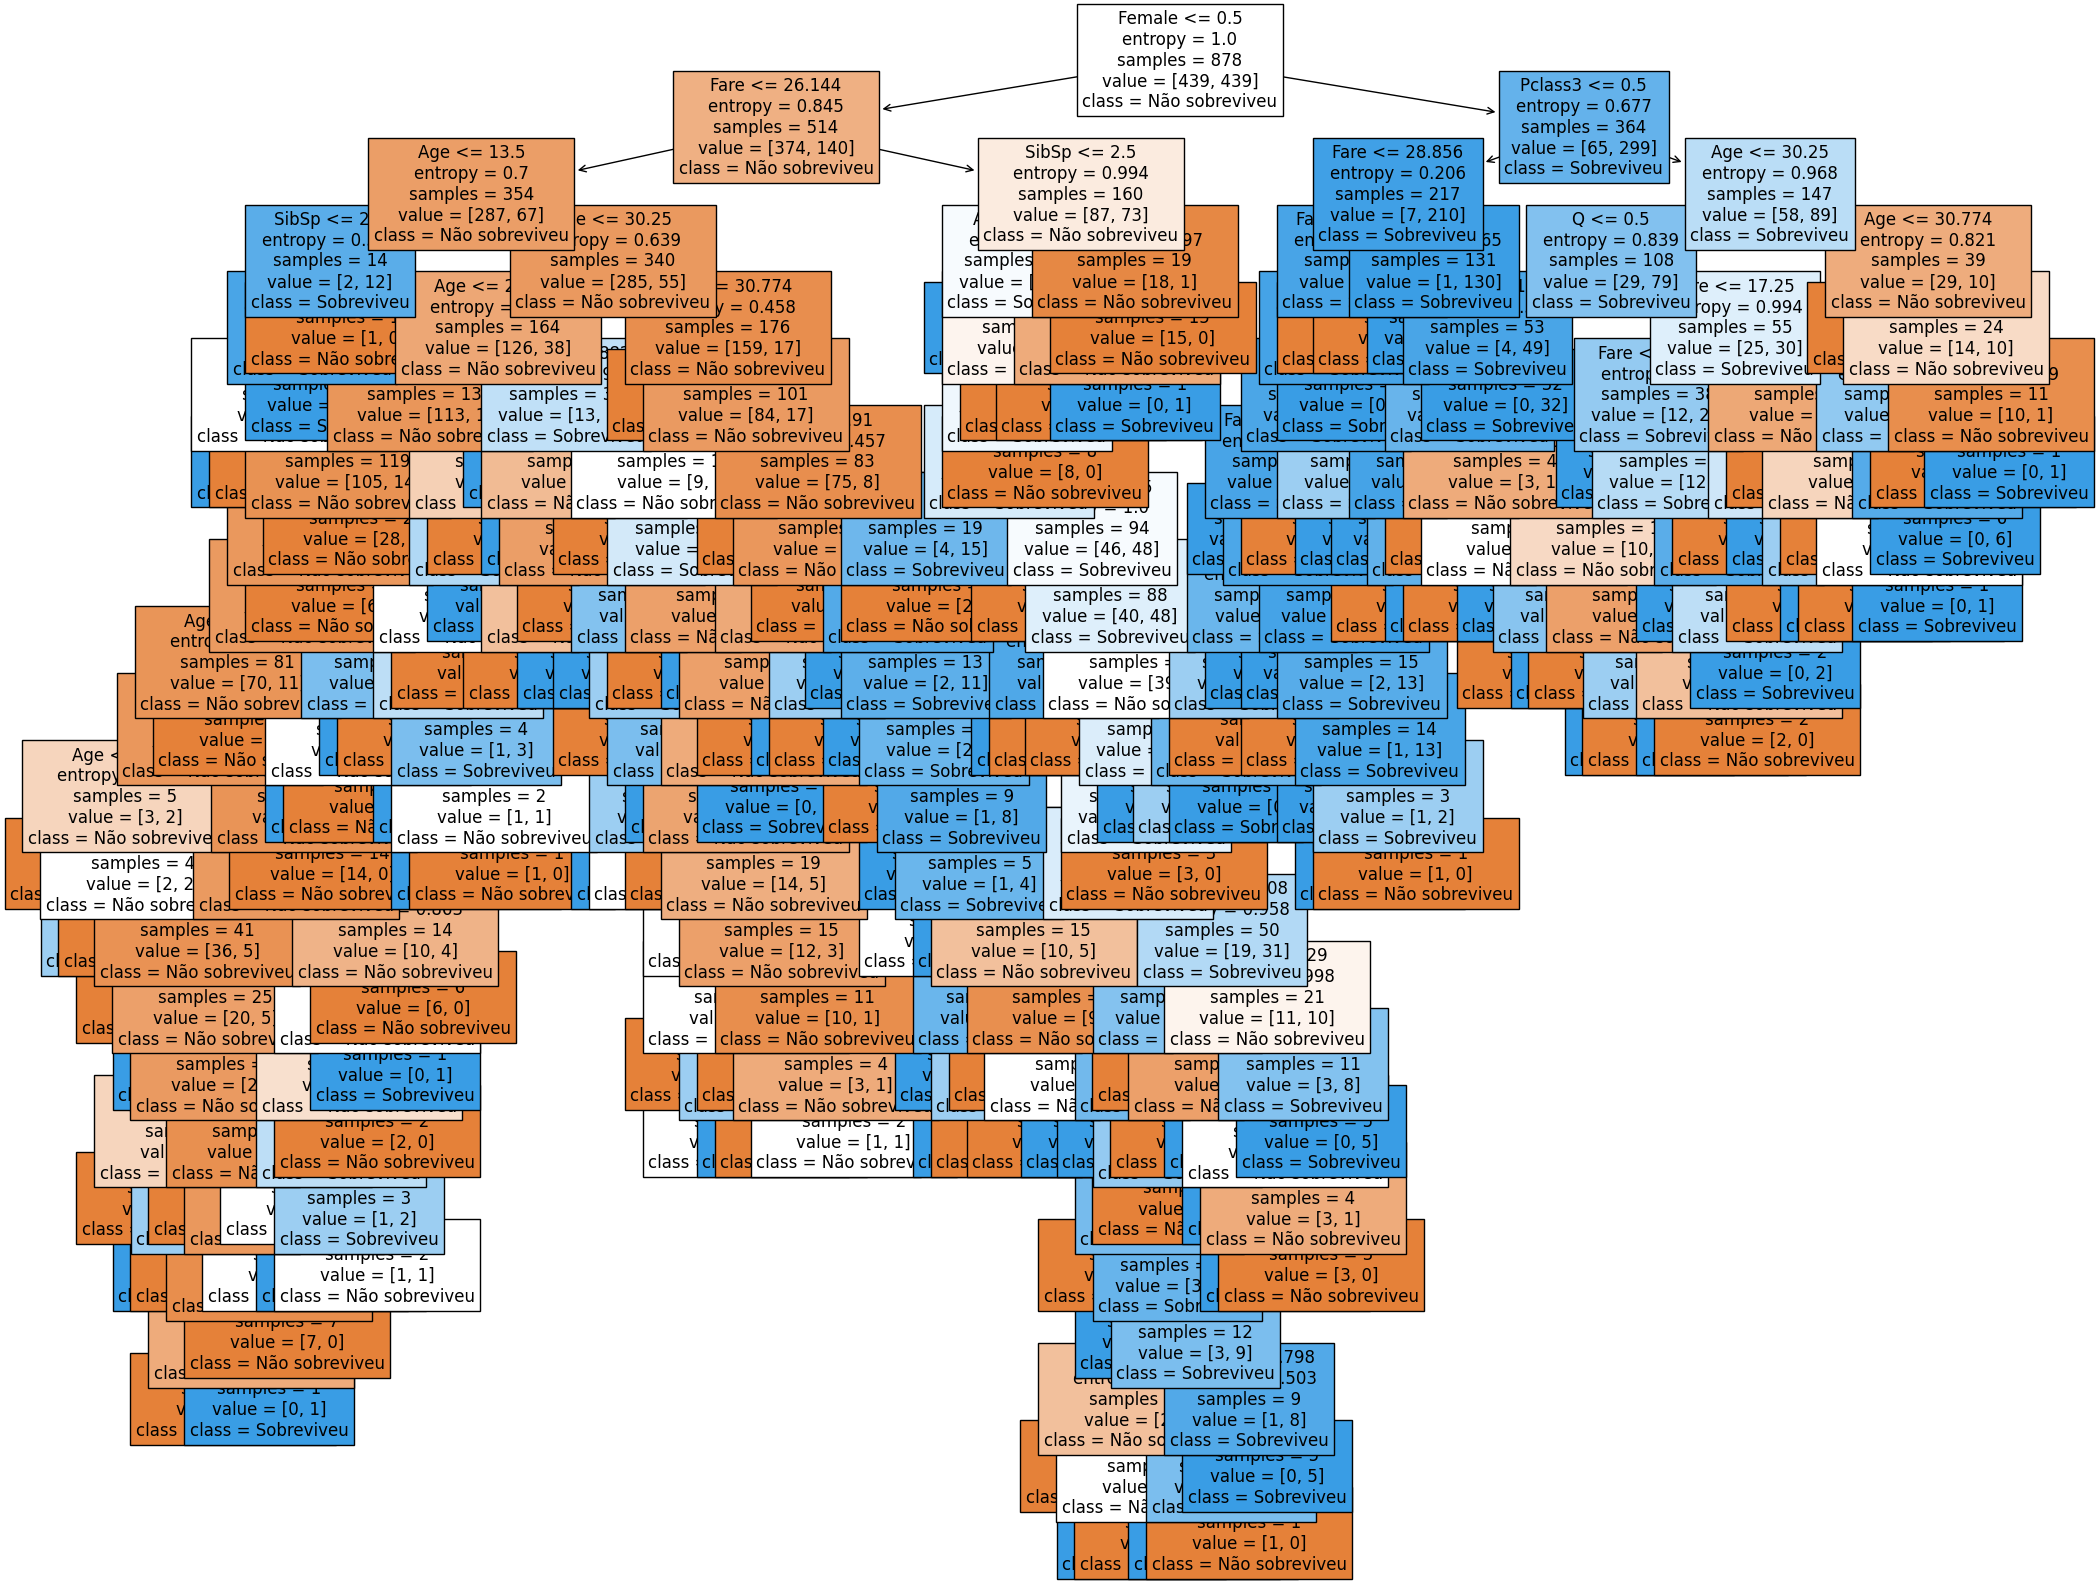

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_5,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

**Experimento 6 usando Árvore de Decisão:**

In [ ]:
clf_6 = DecisionTreeClassifier(ccp_alpha=0.0001)

clf_6.fit(X_data, y_data) # treinando o modelo

DecisionTreeClassifier(ccp_alpha=0.0001)

Acurácia do modelo escolhido:

In [ ]:
clf_6.score(X_data_test, y_data_test)

0.7818181818181819

Assim, com os parâmetros,

```javascript
{
  'ccp_alpha': 'ccp_alpha': 0.0001,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'
}
```
temos uma acurácia de 78,18%.

In [ ]:
feature_names = X_data.columns
feature_importance = pd.DataFrame(clf_6.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
Age      0.340230
Female   0.301358
Fare     0.164808
Pclass3  0.057421
SibSp    0.050327
Pclass1  0.037083
Q        0.022886
C        0.013248
Pclass2  0.005473
Parch    0.004039
S        0.003127
Male     0.000000

<Axes: >

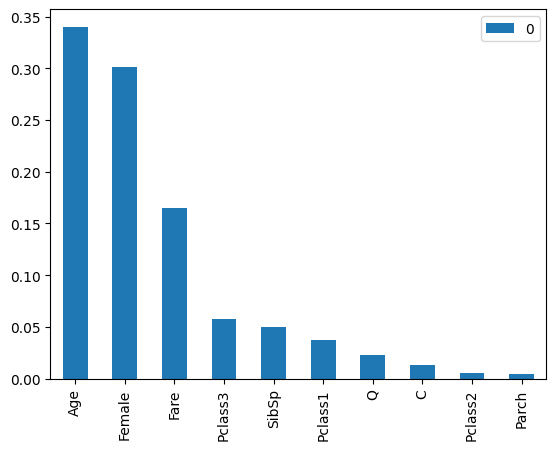

In [ ]:
feature_importance.head(10).plot(kind='bar')

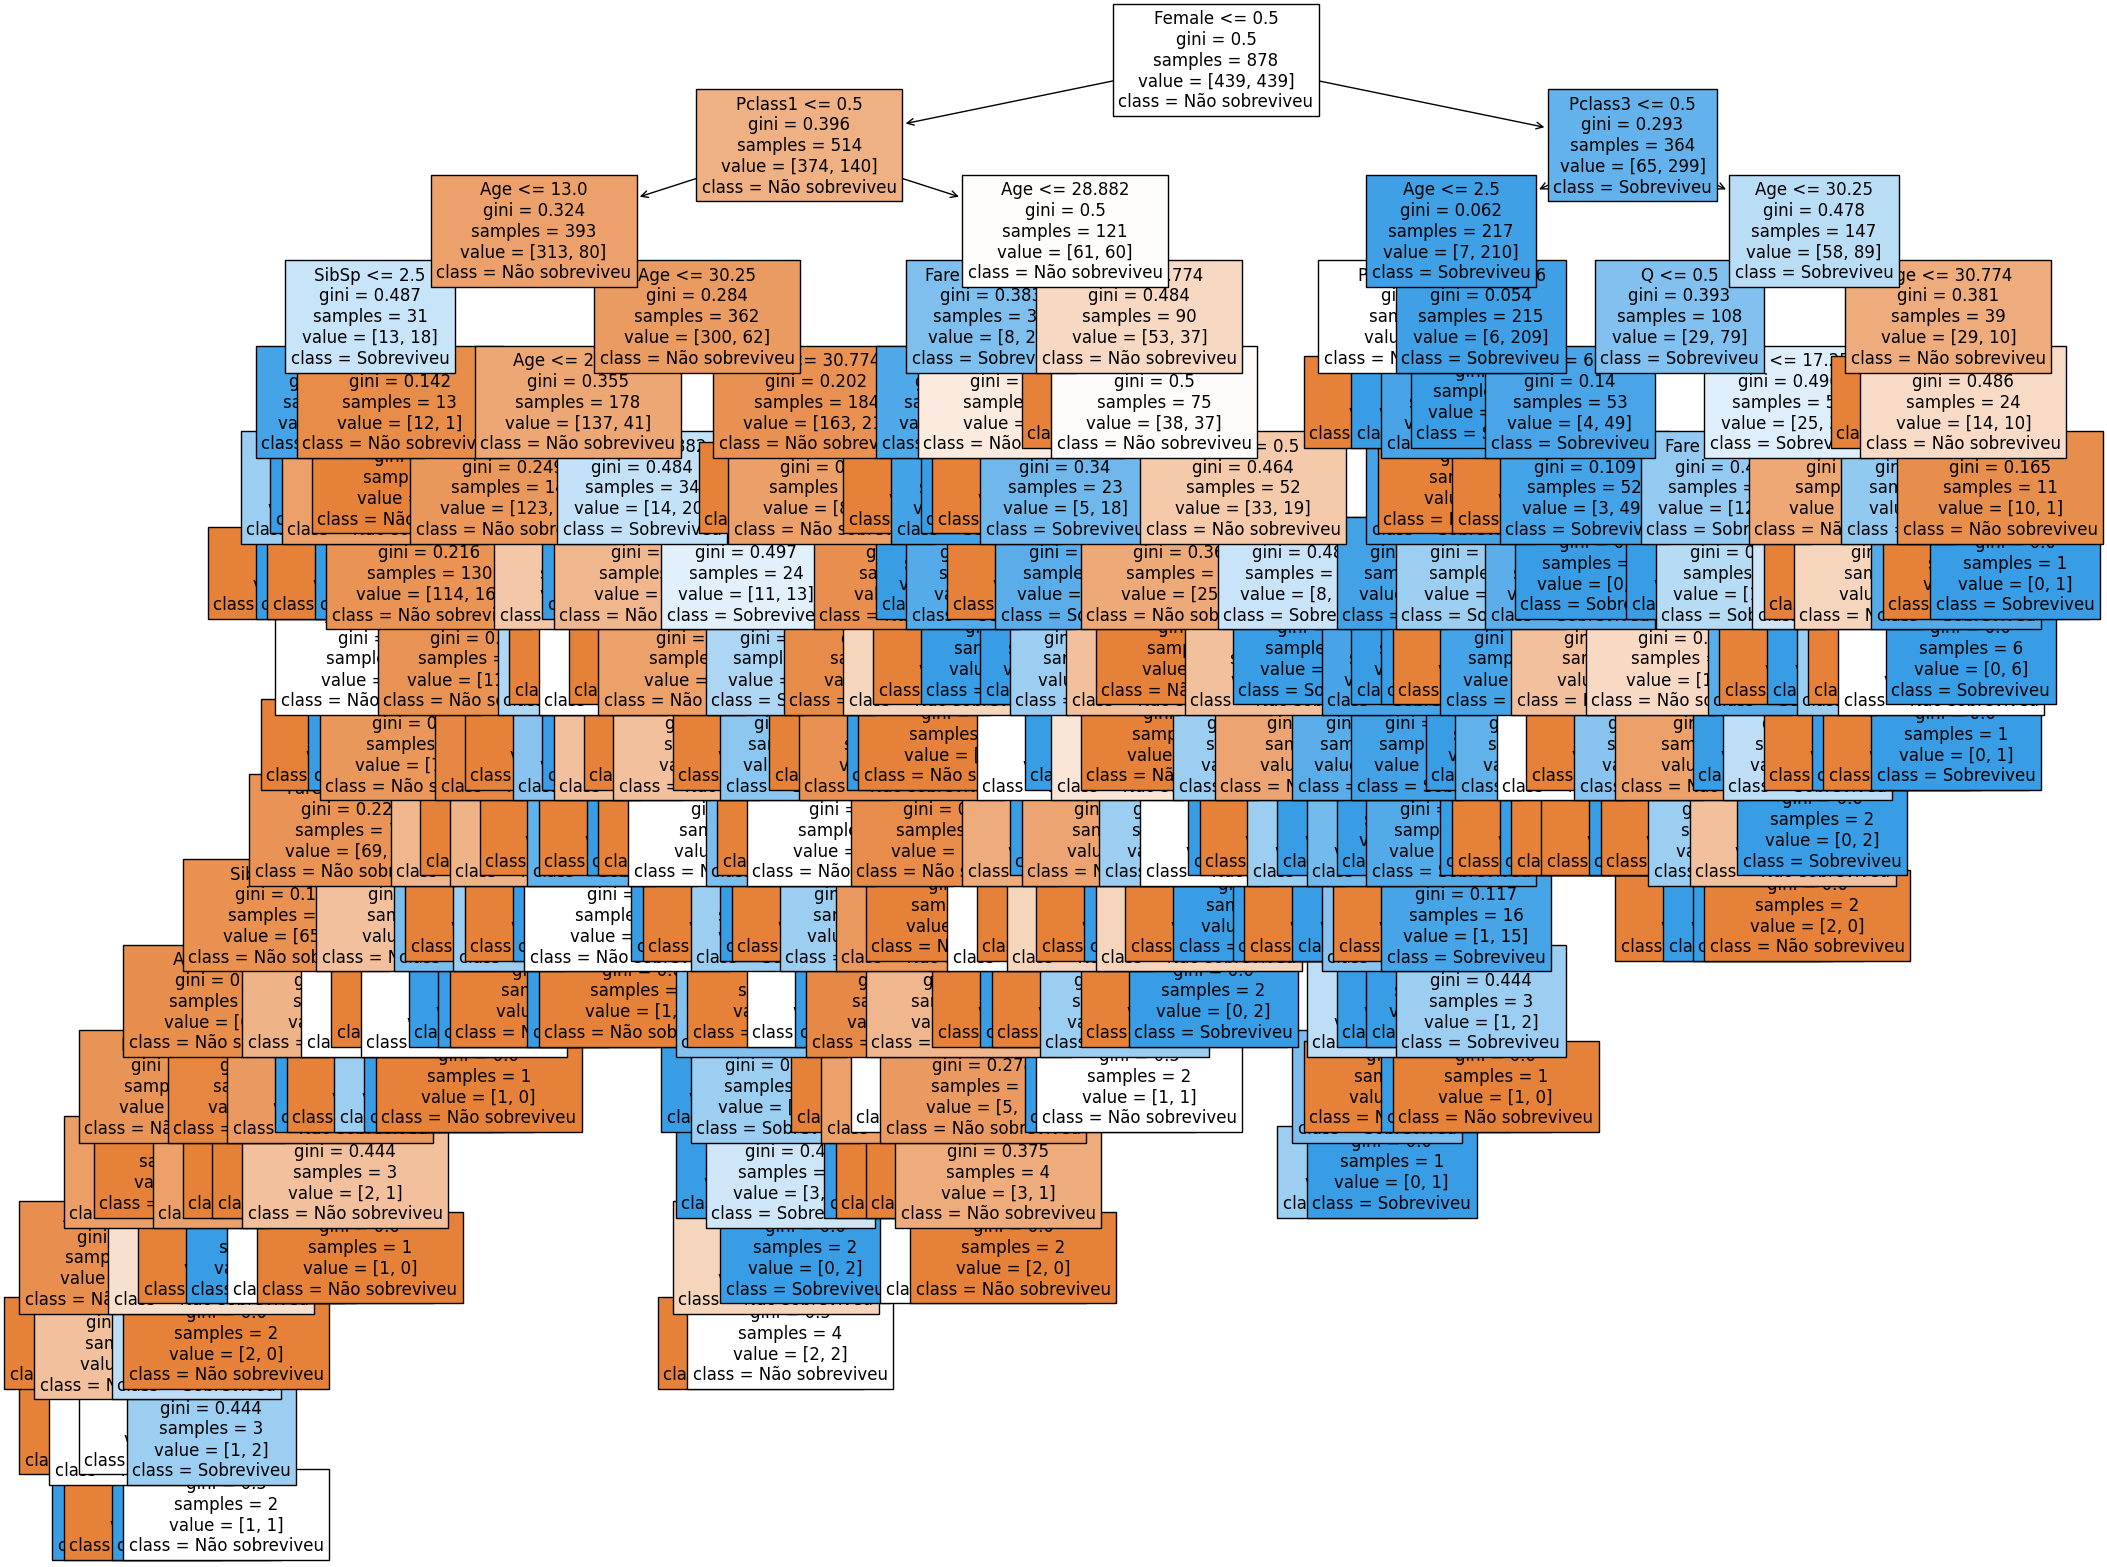

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_6,
                   feature_names=feature_names,
                   class_names={0:'Não sobreviveu', 1:'Sobreviveu'},
                   filled=True,
                  fontsize=12)

Agora vamos treinar o melhor modelo encontrado, o qual é o resultante do Experimento 2, e, assim, treiná-lo em toda a base train.csv.

Após isso, testá-lo com a base test.csv.

Por fim, submeter o resultado no Kaggle para receber o score respectivo.

In [ ]:
clf_final = DecisionTreeClassifier(ccp_alpha=clf_2.ccp_alpha,
                                    criterion=clf_2.criterion,
                                    max_depth=clf_2.max_depth,
                                    max_features=clf_2.max_features,
                                    min_samples_leaf=clf_2.min_samples_leaf,
                                    min_samples_split=clf_2.min_samples_split,
                                    splitter=clf_2.splitter)
clf_final.fit(X_data_final, y_data_final)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3,
                       splitter='random')

In [ ]:
titanic_test_data = pd.read_csv('data/test.csv') # aplicando o tratamento de dados ao dataset em test.csv
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data = final_test_data.fillna(method='ffill')
predictions = clf_final.predict(final_test_data)

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('data/predictions.csv', index=False)

O modelo acima teve acurácia de 72,24% no Kaggle.

Descrição dos parâmetros do RandomForestClassifier:

- criterion: Função que mede a qualidade de uma divisão.

- splitter: Estratégia utilizada para realizar a divisão em cada nó.

- max_depth: Profundidade máxima da árvore.

- min_samples_split: Número mínimo de exemplos para realizar uma divisão num nó.

- min_samples_leaf: Número mínimo de exemplos para um nó ser uma folha.

- max_leaf_nodes: Número máximo de folhas

- n_estimators: número de árvores na floresta

- max_features: Número de variáveis que devem ser consideradas para escolher a melhor divisão.

- max_samples (bootstrap=True): Determina qual fração do dataset original é dado para cada árvore.

- ccp_alpha: Parâmetro de complexidade utilizado no algoritmo de poda Minimal Cost-Complexity Pruning.






**Experimento 7 usando Floresta Aleatória:**

Analisando o parâmetro max_depth

In [ ]:
max_depth_list = range(1,101)

scores = []

for max_depth in max_depth_list:
    clf7 = RandomForestClassifier(max_depth=max_depth)
    clf7.fit(X_data, y_data)
    score = clf7.score(X_data_test, y_data_test)
    scores.append(score)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, scores, marker='o', linestyle='-')
plt.title('Desempenho do RandomForestClassifier em relação a max_depth')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.tight_layout()
plt.show()


É possível notar a partir do experimento 7 que o score começa a permancer mais ou menos constante a partir de valores de max_depth entre 20 e 30

In [ ]:
max(scores)


0.8545454545454545

**Experimento 8 usando Floresta Aleatória:**

Analisando o parâmetro min_samples_split:

In [ ]:
min_samples_split_list = range(2,302)

scores = []

for min_samples_split in min_samples_split_list:
    clf7 = RandomForestClassifier(min_samples_split=min_samples_split)
    clf7.fit(X_data, y_data)
    score = clf7.score(X_data_test, y_data_test)
    scores.append(score)

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_list, scores, marker='o', linestyle='-')
plt.title('Desempenho do RandomForestClassifier em relação a min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.xticks(np.arange(0, 302, step=30))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
max(scores)

0.85

**Experimento 9 usando Floresta Aleatória:**

Analisando o parâmetro max_leaf_nodes:

In [ ]:
max_leaf_nodes_list = range(2,302)

scores = []

for max_leaf_nodes in max_leaf_nodes_list:
    clf7 = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes)
    clf7.fit(X_data, y_data)
    score = clf7.score(X_data_test, y_data_test)
    scores.append(score)

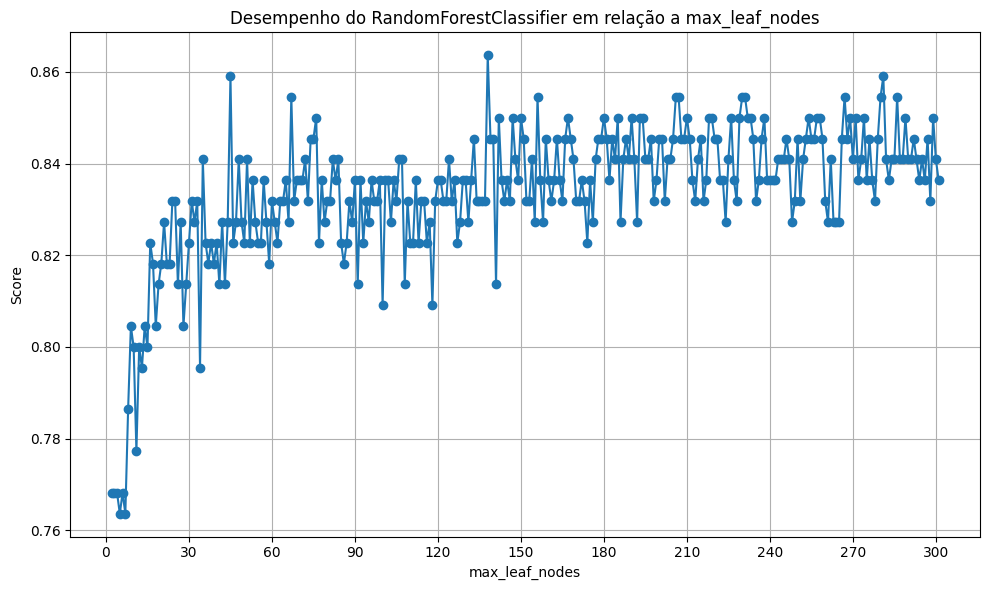

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_leaf_nodes_list, scores, marker='o', linestyle='-')
plt.title('Desempenho do RandomForestClassifier em relação a max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Score')
plt.xticks(np.arange(0, 302, step=30))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
max(scores)

0.8363636363636363

**Experimento 10 usando Floresta Aleatória:**

Analisando o parâmetro min_samples_leaf:

In [ ]:
min_samples_leaf_list = range(1,201)

scores = []

for min_samples_leaf in min_samples_leaf_list:
    clf7 = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    clf7.fit(X_data, y_data)
    score = clf7.score(X_data_test, y_data_test)
    scores.append(score)


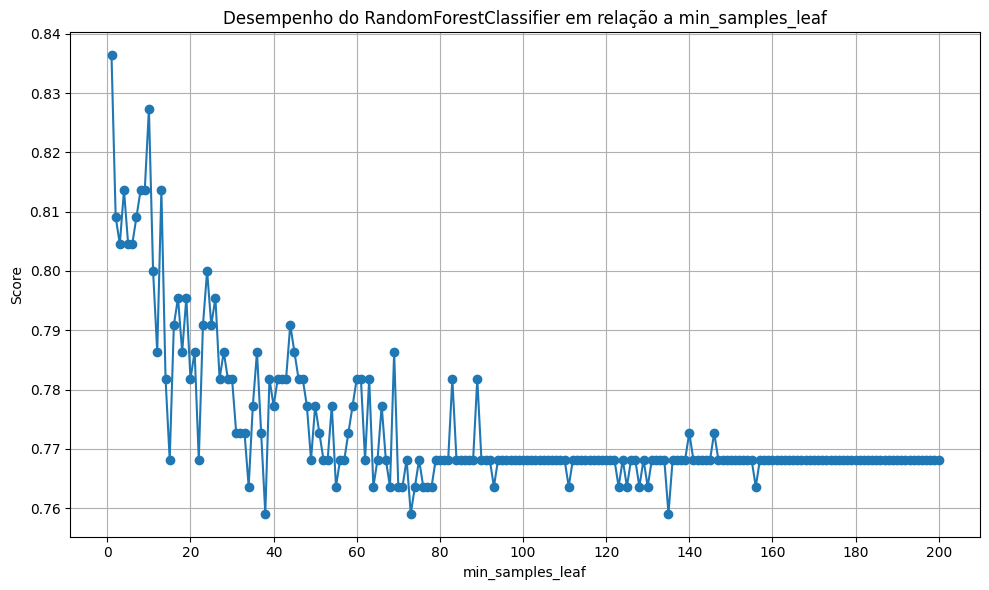

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_list, scores, marker='o', linestyle='-')
plt.title('Desempenho do RandomForestClassifier em relação a min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Score')
plt.xticks(np.arange(0, 201, step=20))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
max(scores)

0.8363636363636363

**Experimento 11 usando Floresta Aleatória:**

Analisando o parâmetro n_estimators:

In [ ]:
n_estimators_list = range(1,301)

scores = []

for n_estimators in n_estimators_list:
    clf7 = RandomForestClassifier(n_estimators=n_estimators)
    clf7.fit(X_data, y_data)
    score = clf7.score(X_data_test, y_data_test)
    scores.append(score)


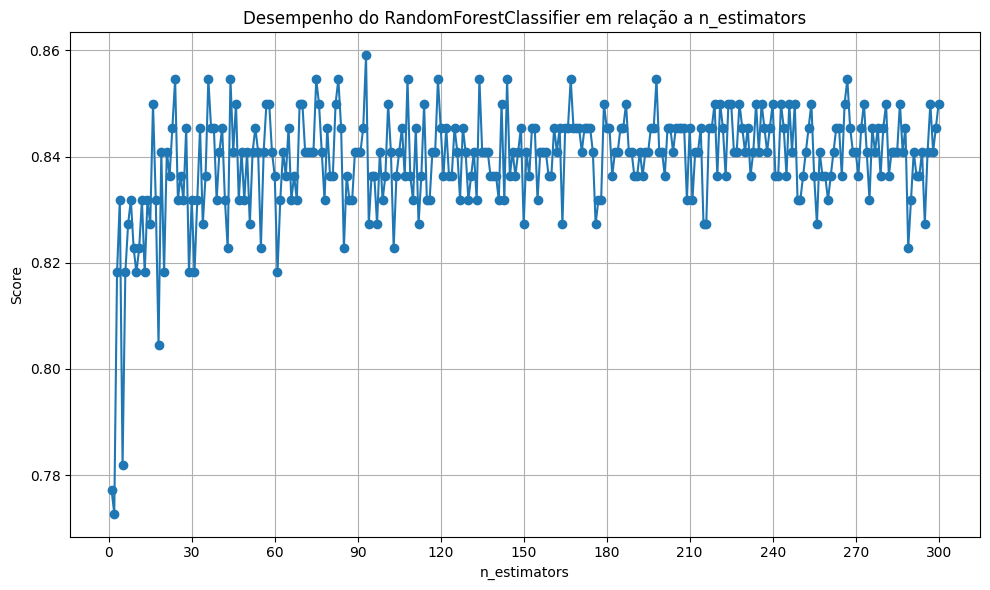

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, scores, marker='o', linestyle='-')
plt.title('Desempenho do RandomForestClassifier em relação a n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.xticks(np.arange(0, 301, step=30))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
max(scores)

0.8590909090909091

**Experimento 12 usando Floresta Aleatória:**

In [ ]:
clf_grid_search = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 200, 400],
    'min_samples_leaf': [1, 25, 50],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes':[None, 20, 40],
    'n_estimators': [10, 50, 100],
}

grid_search = GridSearchCV(clf_grid_search, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_leaf': [1, 25, 50],
                         'min_samples_split': [2, 200, 400],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_estimator_.score(X_data_test, y_data_test)

0.8409090909090909

Agora vamos treinar o modelo encontrado pelo grid search em toda a base train.csv.

Após isso, testá-lo com a base test.csv.

Por fim, submeter o resultado no Kaggle para receber o score respectivo.

In [ ]:
clf_final = grid_search.best_estimator_
clf_final.fit(X_data_final, y_data_final)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=None)

In [ ]:
titanic_test_data = pd.read_csv('data/test.csv') # aplicando o tratamento de dados ao dataset em test.csv
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data = final_test_data.fillna(method='ffill')
predictions = clf_final.predict(final_test_data)

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('data/predictions.csv', index=False)

O modelo acima teve acurácia de 74% no Kaggle.



## Resultados:

> Árvore de Decisão:

> > - Experimento 1: com os parâmetros
```javascript
{
  ccp_alpha=0.0
  criterion='gini',
  splitter='best',
  max_depth=4,
  min_samples_split=2,
  min_samples_leaf=2,
  max_features=4
}
```
⇒ **acurácia de 78,63%** nos 20% de train.csv.

> > - Experimento 2: com os parâmetros
```javascript
{
  ccp_alpha=0.0
  criterion='entropy',
  splitter='random',
  max_depth=12,
  min_samples_split=3,
  min_samples_leaf=1
  max_features=None
}
```
⇒ **acurácia de 84,09%** nos 20% de train.csv.

> > - Experimento 3: com os parâmetros
```javascript
{
  criterion='gini',
  splitter='best',
  max_depth=8,
  min_samples_split=3,
  min_samples_leaf=2,
  ccp_alpha=0.001
  max_features=None
}
```
 ⇒ **acurácia de 73,63%** nos 20% de train.csv.

> > - Experimento 4: com os parâmetros
```javascript
{
  ccp_alpha=0.0
  criterion='entropy',
  splitter='best',
  max_depth=9,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=2
}
```
⇒ **acurácia de 82,72%** nos 20% de train.csv.

> > - Experimento 5 (GridSearchCV): com os parâmetros
```javascript
{
  'ccp_alpha': 0.0,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'
}
```
 ⇒ **acurácia de 82,72%** nos 20% de train.csv.

> > - Experimento 6: com os parâmetros
```javascript
{
  'ccp_alpha': 'ccp_alpha': 0.0001,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'
}
```
 ⇒ **acurácia de 78,18%** nos 20% de train.csv.

> > - Score no Kaggle do classificador final (mesmos parâmetros do Experimento 2 só que treinado em todo o train.csv): 72,24%.

> Floresta Aleatória:

> > - Experimento 7: variando o parâmetro max_depth ⇒ **maior score de de 85,45%** nos 20% de train.csv.

> > - Experimento 8: variando o parâmetro min_samples_split ⇒ **maior score de 85%** nos 20% de train.csv.

> > - Experimento 9: variando o parâmetro max_leaf_nodes ⇒ **maior score de 83,63%** nos 20% de train.csv.

> > - Experimento 10: variando o parâmetro min_samples_leaf ⇒ **acurácia de 83,63%** nos 20% de train.csv.

> > - Experimento 11 : variando o parâmetro n_estimators ⇒ **maior score de 85,9%** nos 20% de train.csv.

> > - Experimento 12: GridSearchCV ⇒ **score de 84,1%** nos 20% de train.csv.

> > - Score no Kaggle do classficador com os parâmetros escolhidos pelo GridSearchCV (só que treinado em todo o train.csv): 74%.